In [1]:
# The code was removed by DSX for sharing.

In [2]:
#Required Packages Section
if(!require(devtools)){
    install.packages("devtools")
    library(devtools)
}

Loading required package: devtools


In [3]:
# Install custom (IBM DSX GitHub) packages
# https://github.com/IBMDataScience/objectStoreR
install_github('IBMDataScience/objectStoreR')

Skipping install of 'objectStoreR' from a github remote, the SHA1 (d6a07c5b) has not changed since last install.
  Use `force = TRUE` to force installation


In [4]:
## Load objectStoreR into the session
library('objectStoreR')

In [5]:
# Using the package objectStoreR, invoke the "get" function to retrieve "sample.csv"
# from object storage and put into a data frame
sampleData <- objectStore.get(credentials_1)

No encoding supplied: defaulting to UTF-8.


In [6]:
# Verify dataframe
is.data.frame(sampleData)

[1] TRUE

In [7]:
# Output contents of data frame
sampleData

name,age
fred,18
sue,28
alex,12


In [8]:
# Grab external data and put it into a dataframe
# Document the URL and timestamp for the download

fileUrl <- "https://spark-public.s3.amazonaws.com/dataanalysis/loansData.csv?accessType=DOWNLOAD"
download.file(fileUrl,destfile="./loansData.csv",mode="w")
loanDataRaw <- read.csv("./loansData.csv",as.is=TRUE)
# Mark the date of this download
dateDownloaded <- date()

In [9]:
# Self-document file source and download date
cat("File accessed from =>", fileUrl, "\n")
cat("File downloaded on =>" , dateDownloaded)

File accessed from => https://spark-public.s3.amazonaws.com/dataanalysis/loansData.csv?accessType=DOWNLOAD 
File downloaded on => Fri Mar 24 15:10:15 2017

In [10]:
# ------------------------------------
# --- DATA EXPLORATION BEGINS HERE ---
# ------------------------------------

# Quick look at shape and size of "loanDataRaw"
# Rows and columns
dim(loanDataRaw)

[1] 2500   14

In [11]:
# Quick look at shape and size of "loanDataRaw"
str(loanDataRaw)

# Additional R commands for investigation
# sapply(loanDataRaw[1,],class)
# summary(loandDataRaw)

'data.frame':	2500 obs. of  14 variables:
 $ Amount.Requested              : int  20000 19200 35000 10000 12000 6000 10000 33500 14675 7000 ...
 $ Amount.Funded.By.Investors    : num  20000 19200 35000 9975 12000 ...
 $ Interest.Rate                 : chr  "8.90%" "12.12%" "21.98%" "9.99%" ...
 $ Loan.Length                   : chr  "36 months" "36 months" "60 months" "36 months" ...
 $ Loan.Purpose                  : chr  "debt_consolidation" "debt_consolidation" "debt_consolidation" "debt_consolidation" ...
 $ Debt.To.Income.Ratio          : chr  "14.90%" "28.36%" "23.81%" "14.30%" ...
 $ State                         : chr  "SC" "TX" "CA" "KS" ...
 $ Home.Ownership                : chr  "MORTGAGE" "MORTGAGE" "MORTGAGE" "MORTGAGE" ...
 $ Monthly.Income                : num  6542 4583 11500 3833 3195 ...
 $ FICO.Range                    : chr  "735-739" "715-719" "690-694" "695-699" ...
 $ Open.CREDIT.Lines             : int  14 12 14 10 11 17 10 12 9 8 ...
 $ Revolving.CREDIT.Balance

In [12]:
# Return first few rows of data.frame
head(loanDataRaw, n=15)

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
81174,20000,20000.00,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14,14272,2,< 1 year
99592,19200,19200.00,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12,11140,1,2 years
80059,35000,35000.00,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14,21977,1,2 years
15825,10000,9975.00,9.99%,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10,9346,0,5 years
33182,12000,12000.00,11.71%,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11,14469,0,9 years
62403,6000,6000.00,15.31%,36 months,other,20.05%,CT,OWN,4891.67,670-674,17,10391,2,3 years
48808,10000,10000.00,7.90%,36 months,debt_consolidation,26.09%,MA,RENT,2916.67,720-724,10,15957,0,10+ years
22090,33500,33450.00,17.14%,60 months,credit_card,14.70%,LA,MORTGAGE,13863.42,705-709,12,27874,0,10+ years
76404,14675,14675.00,14.33%,36 months,credit_card,26.92%,CA,RENT,3150.00,685-689,9,7246,1,8 years
15867,7000,7000.00,6.91%,36 months,credit_card,7.10%,CA,RENT,5000.00,715-719,8,7612,0,3 years


In [13]:
# Write source data file to the object store.  This will prevent us from having to pull it
# down from the URL should we need it again.
write.csv(loanDataRaw, file ='loansData.csv')
status<- objectStore.put(credentials_1,'loansData.csv')
status

# ----------------------------------
# --- DATA EXPLORATION ENDS HERE ---
# ----------------------------------

[1] 201

In [14]:
# ----------------------------------
# --- DATA CLEANSING BEGINS HERE ---
# ----------------------------------

# Step 1
# Get rid of those pesky periods in the column heading.  This is not a requirement
# not will it necessarilly improve readability. However, I don't like looking at
# them and as such I am going to remove them.

cat("Column names before:","\n")
names(loanDataRaw)

names(loanDataRaw)<- gsub("\\.","", names(loanDataRaw))

# I need to fix a few other columns such that all columns conform to our chosen
# casing method of UpperCamelCase
colnames(loanDataRaw)[12] <- "RevolvingCreditBalance"
colnames(loanDataRaw)[11] <- "OpenCreditLines"
colnames(loanDataRaw)[13] <- "InquiriesLast6Months"

# Verify results
cat("Column names after:","\n")
names(loanDataRaw)

Column names before: 


[1] "Amount.Requested"               "Amount.Funded.By.Investors"    
 [3] "Interest.Rate"                  "Loan.Length"                   
 [5] "Loan.Purpose"                   "Debt.To.Income.Ratio"          
 [7] "State"                          "Home.Ownership"                
 [9] "Monthly.Income"                 "FICO.Range"                    
[11] "Open.CREDIT.Lines"              "Revolving.CREDIT.Balance"      
[13] "Inquiries.in.the.Last.6.Months" "Employment.Length"

Column names after: 


[1] "AmountRequested"         "AmountFundedByInvestors"
 [3] "InterestRate"            "LoanLength"             
 [5] "LoanPurpose"             "DebtToIncomeRatio"      
 [7] "State"                   "HomeOwnership"          
 [9] "MonthlyIncome"           "FICORange"              
[11] "OpenCreditLines"         "RevolvingCreditBalance" 
[13] "InquiriesLast6Months"    "EmploymentLength"

In [15]:
# Step 2
# Strip out '%' sign from InterestRate and DebtToIncomeRation
loanDataRaw$InterestRate <- gsub("%", "", as.character(loanDataRaw$InterestRate))
loanDataRaw$DebtToIncomeRatio <- gsub("%", "", as.character(loanDataRaw$DebtToIncomeRatio))
# Cast values to numeric
loanDataRaw$InterestRate <- as.numeric(loanDataRaw$InterestRate)
loanDataRaw$DebtToIncomeRatio <- as.numeric(loanDataRaw$DebtToIncomeRatio)

# Verify results
str(loanDataRaw)

'data.frame':	2500 obs. of  14 variables:
 $ AmountRequested        : int  20000 19200 35000 10000 12000 6000 10000 33500 14675 7000 ...
 $ AmountFundedByInvestors: num  20000 19200 35000 9975 12000 ...
 $ InterestRate           : num  8.9 12.12 21.98 9.99 11.71 ...
 $ LoanLength             : chr  "36 months" "36 months" "60 months" "36 months" ...
 $ LoanPurpose            : chr  "debt_consolidation" "debt_consolidation" "debt_consolidation" "debt_consolidation" ...
 $ DebtToIncomeRatio      : num  14.9 28.4 23.8 14.3 18.8 ...
 $ State                  : chr  "SC" "TX" "CA" "KS" ...
 $ HomeOwnership          : chr  "MORTGAGE" "MORTGAGE" "MORTGAGE" "MORTGAGE" ...
 $ MonthlyIncome          : num  6542 4583 11500 3833 3195 ...
 $ FICORange              : chr  "735-739" "715-719" "690-694" "695-699" ...
 $ OpenCreditLines        : int  14 12 14 10 11 17 10 12 9 8 ...
 $ RevolvingCreditBalance : int  14272 11140 21977 9346 14469 10391 15957 27874 7246 7612 ...
 $ InquiriesLast6Months   : 

In [16]:
# Step 3
# Break up FICORange into three columns: FICOLow,FICOHigh,FICOAvg.
# Split FICORange into FICOLow and FICOHigh
# http://stackoverflow.com/questions/10421668/strsplit-one-column-with-exact-information-into-two-column
ficoSplitDat <- data.frame(do.call(rbind, strsplit(as.vector(loanDataRaw$FICORange), split = "-")))
# Assign column headings to new columns
names(ficoSplitDat)<- c("FICOLow", "FICOHigh")
# Append new columns to data frame
loanDataRaw <- cbind(loanDataRaw, ficoSplitDat)
# Convert FICOHigh and FiCOLow to data type integer in dataframe.
loanDataRaw$FICOLow <- as.integer(levels(loanDataRaw$FICOLow)[as.numeric(loanDataRaw$FICOLow)])
loanDataRaw$FICOHigh <- as.integer(levels(loanDataRaw$FICOHigh)[as.numeric(loanDataRaw$FICOHigh)])

ficoSplitDat$FICOLow <- as.numeric(as.character(ficoSplitDat$FICOLow))
ficoSplitDat$FICOHigh <- as.numeric(as.character(ficoSplitDat$FICOHigh))
# Calculate avg of two columns and direct to new data.frame
ficoAvgDat <- data.frame(rowMeans(ficoSplitDat,na.rm=TRUE))
# Assign column heading to new column
names(ficoAvgDat)<- c("FICOAvg")
# Append new column to data frame
loanDataRaw <- cbind(loanDataRaw, ficoAvgDat)

# Verify results of thenew columns
ficoData <- loanDataRaw[,c(15,16,17)]
str(ficoData)

'data.frame':	2500 obs. of  3 variables:
 $ FICOLow : int  735 715 690 695 695 670 720 705 685 715 ...
 $ FICOHigh: int  739 719 694 699 699 674 724 709 689 719 ...
 $ FICOAvg : num  737 717 692 697 697 672 722 707 687 717 ...


In [17]:
str(loanDataRaw)

'data.frame':	2500 obs. of  17 variables:
 $ AmountRequested        : int  20000 19200 35000 10000 12000 6000 10000 33500 14675 7000 ...
 $ AmountFundedByInvestors: num  20000 19200 35000 9975 12000 ...
 $ InterestRate           : num  8.9 12.12 21.98 9.99 11.71 ...
 $ LoanLength             : chr  "36 months" "36 months" "60 months" "36 months" ...
 $ LoanPurpose            : chr  "debt_consolidation" "debt_consolidation" "debt_consolidation" "debt_consolidation" ...
 $ DebtToIncomeRatio      : num  14.9 28.4 23.8 14.3 18.8 ...
 $ State                  : chr  "SC" "TX" "CA" "KS" ...
 $ HomeOwnership          : chr  "MORTGAGE" "MORTGAGE" "MORTGAGE" "MORTGAGE" ...
 $ MonthlyIncome          : num  6542 4583 11500 3833 3195 ...
 $ FICORange              : chr  "735-739" "715-719" "690-694" "695-699" ...
 $ OpenCreditLines        : int  14 12 14 10 11 17 10 12 9 8 ...
 $ RevolvingCreditBalance : int  14272 11140 21977 9346 14469 10391 15957 27874 7246 7612 ...
 $ InquiriesLast6Months   : 

In [18]:
# Are there any rows with null values in any of the columns
loanDataRaw[!complete.cases(loanDataRaw),]

,AmountRequested,AmountFundedByInvestors,InterestRate,LoanLength,LoanPurpose,DebtToIncomeRatio,State,HomeOwnership,MonthlyIncome,FICORange,OpenCreditLines,RevolvingCreditBalance,InquiriesLast6Months,EmploymentLength,FICOLow,FICOHigh,FICOAvg
101596,5000,4525,7.43,36 months,other,1,NY,NONE,NA,800-804,NA,NA,NA,< 1 year,800,804,802
101515,3500,225,10.28,36 months,other,10,NY,RENT,15000,685-689,NA,NA,NA,< 1 year,685,689,687


In [19]:
# There are only two and for demonstration purposes I will remove them
cat("Row counter before =>", nrow(loanDataRaw), "\n")
loanDataRaw <- na.omit(loanDataRaw)
cat("Row counter after =>", nrow(loanDataRaw), "\n")

Row counter before => 2500 
Row counter after => 2498 


In [20]:
# To help run models you might consider refactoring categorical string data to numerics.
# Recode LoanPurpose to numerics
# "debt_consolidation"  => 0
# "credit_card"         => 1    
# "other"               => 2            
# "moving"              => 3         
# "car"                 => 4          
# "vacation"            => 5      
# "home_improvement"    => 6
# "house"               => 7
# "major_purchase"      => 8 
# "educational"         => 9    
# "medical"             => 10     
# "wedding"             => 11    
# "small_business"      => 12  
# "renewable_energy"    => 13
loanDataRaw$LoanPurpose <- factor(loanDataRaw$LoanPurpose) # First step: copy vector and make it factor
# Change levels:
levels(loanDataRaw$LoanPurpose) <- list(
    "0" = c("debt_consolidation"),
    "1" = c("credit_card"),
    "2" = c("other"),
    "3" = c("moving"),
    "4" = c("car"),
    "5" = c("vacation"),
    "6" = c("home_improvement"),
    "7" = c("house"),
    "8" = c("major_purchase"),
    "9" = c("educational"),
    "10" = c("medical"),
    "11" = c("wedding"),
    "12" = c("small_business"),
    "13" = c("renewable_energy")
)




In [21]:
# Recode EmploymentLength to numerics
# "< 1 year"  => 0
# "1 year"    => 1
# "2 years"   => 2    
# "3 years"   => 3            
# "4 years"   => 4         
# "5 years"   => 5          
# "6 years"   => 6      
# "7 years"   => 7
# "8 years"   => 8
# "9 years"   => 9 
# "10+ years" => 10   
# "n/a"       => 11  

loanDataRaw$EmploymentLength <- factor(loanDataRaw$EmploymentLength) # First step: copy vector and make it factor
# Change levels:
levels(loanDataRaw$EmploymentLength) <- list(
    "0" = c("< 1 year"),
    "1" = c("1 year"),
    "2" = c("2 years"),
    "3" = c("3 years"),
    "4" = c("4 years"),
    "5" = c("5 years"),
    "6" = c("6 years"),
    "7" = c("7 years"),
    "8" = c("8 years"),
    "9" = c("9 years"),
    "10" = c("10+ years"),
    "11" = c("n/a")
)

In [22]:
# Recode HomeOwnership to numerics
# "MORTGAGE" => 0
# "RENT"     => 1
# "OWN"      => 2    
# "OTHER"    => 3            
# "NONE"     => 4


loanDataRaw$HomeOwnership <- factor(loanDataRaw$HomeOwnership) # First step: copy vector and make it factor
#loanDataRaw$HomeOwnership <- as.numeric(as.character(loanDataRaw$HomeOwnership) # First step: copy vector and make it factor

# Change levels:
levels(loanDataRaw$HomeOwnership) <- list(
    "0" = c("MORTGAGE"),
    "1" = c("RENT"),
    "2" = c("OWN"),
    "3" = c("OTHER"),
    "4" = c("NONE")
)

loanDataRaw$HomeOwnership <- as.numeric(as.character(loanDataRaw$HomeOwnership))


In [23]:
# Recode Loan Length to numerics
# "36 months" => 36
# "60 months" => 60

loanDataRaw$LoanLength <- factor(loanDataRaw$LoanLength) # First step: copy vector and make it factor
# Change levels:
levels(loanDataRaw$LoanLength) <- list(
    "36" = c("36 months"),
    "60" = c("60 months")
)
loanDataRaw$LoanLength <- as.numeric(as.character(loanDataRaw$LoanLength))

In [24]:
# Quick check of the data
str(loanDataRaw)

'data.frame':	2498 obs. of  17 variables:
 $ AmountRequested        : int  20000 19200 35000 10000 12000 6000 10000 33500 14675 7000 ...
 $ AmountFundedByInvestors: num  20000 19200 35000 9975 12000 ...
 $ InterestRate           : num  8.9 12.12 21.98 9.99 11.71 ...
 $ LoanLength             : num  36 36 60 36 36 36 36 60 36 36 ...
 $ LoanPurpose            : Factor w/ 14 levels "0","1","2","3",..: 1 1 1 1 2 3 1 2 2 2 ...
 $ DebtToIncomeRatio      : num  14.9 28.4 23.8 14.3 18.8 ...
 $ State                  : chr  "SC" "TX" "CA" "KS" ...
 $ HomeOwnership          : num  0 0 0 0 1 2 1 0 1 1 ...
 $ MonthlyIncome          : num  6542 4583 11500 3833 3195 ...
 $ FICORange              : chr  "735-739" "715-719" "690-694" "695-699" ...
 $ OpenCreditLines        : int  14 12 14 10 11 17 10 12 9 8 ...
 $ RevolvingCreditBalance : int  14272 11140 21977 9346 14469 10391 15957 27874 7246 7612 ...
 $ InquiriesLast6Months   : int  2 1 1 0 0 2 0 0 1 0 ...
 $ EmploymentLength       : Factor w/ 12 l

In [25]:
# Write cleansed data to object data store
loanDataFinal <- as.data.frame(loanDataRaw)
write.csv(loanDataRaw, file ='loanDataPrepped.csv')

# Mark the date of this operation
dateAnalyzed <- date()
dateAnalyzed

status<- objectStore.put(credentials_1,'loanDataPrepped.csv')
status

[1] "Fri Mar 24 15:10:16 2017"

[1] 201

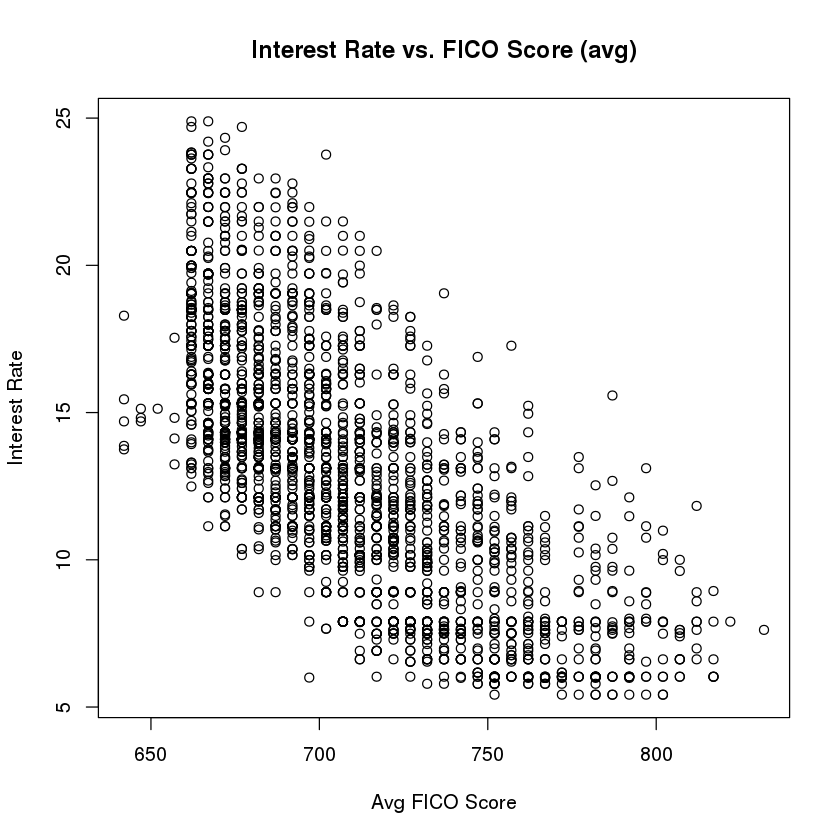

In [26]:
# ---------------------------------
# --- DATA ANALYSIS BEGINS HERE ---
# ---------------------------------

# Exploratory Graphs
plot(loanDataFinal$InterestRate ~ loanDataFinal$FICOAvg, 
     data=loanDataFinal, 
     main="Interest Rate vs. FICO Score (avg)",
     xlab="Avg FICO Score",
     ylab="Interest Rate")

In [27]:
# Check for corrleations

cor(loanDataFinal[c(1,3,4,6,9,12,17)], use="all.obs", method="pearson")
# Output indicates:
# a strong negative correlation between Interest Rate and FICO Avg: -0 .709
# a moderate positive correlation between Interest Rate and AmountFunded: 0.337
# a moderate positive correlation between Interest Rate and LoanLength: 0.423

,AmountRequested,InterestRate,LoanLength,DebtToIncomeRatio,MonthlyIncome,RevolvingCreditBalance,FICOAvg
AmountRequested,1.00000000,0.33183117,0.41229835,0.08128817,0.39117866,0.293365414,0.083378184
InterestRate,0.33183117,1.00000000,0.42350577,0.17220278,0.01292112,0.061108876,-0.709216240
LoanLength,0.41229835,0.42350577,1.00000000,0.02499105,0.07454463,0.055436058,0.012703216
DebtToIncomeRatio,0.08128817,0.17220278,0.02499105,1.00000000,-0.16234470,0.189221189,-0.216962950
MonthlyIncome,0.39117866,0.01292112,0.07454463,-0.16234470,1.00000000,0.359684410,0.122713756
RevolvingCreditBalance,0.29336541,0.06110888,0.05543606,0.18922119,0.35968441,1.000000000,0.002917455
FICOAvg,0.08337818,-0.70921624,0.01270322,-0.21696295,0.12271376,0.002917455,1.000000000



Call:
lm(formula = loanDataFinal$InterestRate ~ loanDataFinal$FICOAvg)

Coefficients:
          (Intercept)  loanDataFinal$FICOAvg  
             73.00811               -0.08467  



Call:
lm(formula = loanDataFinal$InterestRate ~ loanDataFinal$FICOAvg)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.9898 -2.1363 -0.4565  1.8351 10.1935 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           73.008107   1.194023   61.15   <2e-16 ***
loanDataFinal$FICOAvg -0.084675   0.001685  -50.26   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.946 on 2496 degrees of freedom
Multiple R-squared:  0.503,	Adjusted R-squared:  0.5028 
F-statistic:  2526 on 1 and 2496 DF,  p-value: < 2.2e-16


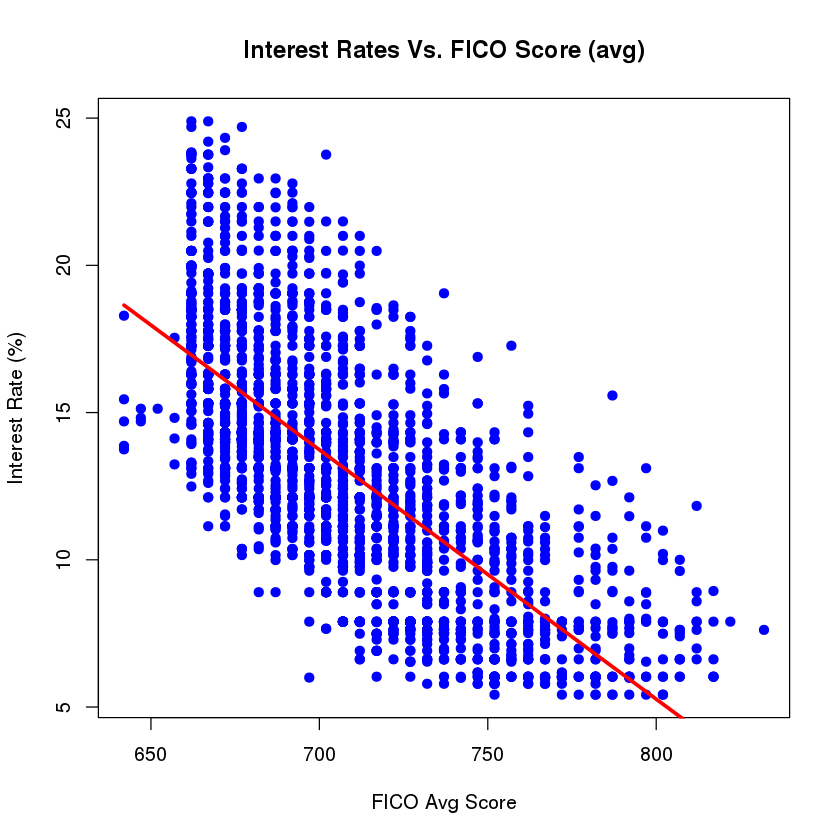

In [28]:
# ----------------------------------------------------
# -- Linear Analysis (Interest Rate v. FICO Avg Score)
# ----------------------------------------------------
#Linear Analysis (Interest Rate vs. FICO Avg Score)
par(mfrow=c(1,1))
lm1<- lm(loanDataFinal$InterestRate ~ loanDataFinal$FICOAvg)
lm1
summary(lm1)
#export Graph (Interest Rate vs. FICO AVg Score)
plot(loanDataFinal$InterestRate ~ loanDataFinal$FICOAvg, pch=19, col='blue',
     xlab="FICO Avg Score",ylab="Interest Rate (%)", main="Interest Rates Vs. FICO Score (avg)")
lines(loanDataFinal$FICOAvg, lm1$fitted, col='red', lwd=3)